In [54]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [55]:
data = np.loadtxt('data.csv', delimiter=',', skiprows=1)
data_X = data[:, 0]
data_y = data[:, 1]

In [58]:
class LinearRegressionModel():
  def __init__(self):
    self.theta_0 = 0
    self.theta_1 = 0

  def hypothesis(self, x):
    return x * self.theta_1 + self.theta_0

  def cost(self, X, y):
    m = y.shape[0]
    y_pred = (self.hypothesis(X) - y) ** 2
    return (1 / (2 * m)) * (np.sum(y_pred))

  def gradientDescent(self, X, y, lr):
    m = y.shape[0]
    y_pred = self.hypothesis(X)
    temp = y_pred - y
    self.theta_0 = self.theta_0 - lr * np.sum(temp) / m
    self.theta_1  = self.theta_1 - lr * np.dot(temp, X) / m
  
  def get_pramas(self):
    return (self.theta_0, self.theta_1)
  
  def __call__(self, X):
    return self.hypothesis(X)
  
  def load(self, path):
    with open(path, 'r') as file:
      data = json.load(file)
      self.theta_0 = data["theta_0"]
      self.theta_1 = data["theta_1"]
  
  def save(self, path):
    data = {
      "theta_0" : self.theta_0,
      "theta_1" : self.theta_1
    }
    with open(path, 'w') as file:
      json.dump(data, file)
  
  


In [59]:
class MinMaxScaler():
  def __init__(self, data):
    data = np.asarray(data)
    self.d_max = np.max(data)
    self.d_min = np.min(data)
    self.d_mean = np.mean(data)
  
  def normalize(self, data):
    return ((data - self.d_mean) / (self.d_max - self.d_min))

  def inverse_normalize(self, data):
    return (data * (self.d_max - self.d_min) + self.d_mean)



In [60]:
X_min_max_scaler = MinMaxScaler(data_X)
y_min_max_scaler = MinMaxScaler(data_y)

X = X_min_max_scaler.normalize(data_X)
y = y_min_max_scaler.normalize(data_y)

# X = data_X
# y = data_y


# m = y.shape[0]
# train_split = int(0.95 * m)
# X_train, y_train = X[:train_split], y[:train_split]
# X_test, y_test = X[train_split:], y[train_split:]

X_train = X
y_train = y 

model = LinearRegressionModel()

arr_train_cost = []
arr_test_cost = []
arr_epoch = []

In [61]:
epochs = 10000

for epoch in range(epochs):
  model.gradientDescent(X_train, y_train, 0.1)
  if epoch % 1000 == 0:
    train_cost = model.cost(X_train, y_train)
    # test_cost = model.cost(X_test, y_test)
    arr_train_cost.append(train_cost)
    #arr_test_cost.append(test_cost)
    arr_epoch.append(epoch)
    print(f"Epoch: {epoch} | Train loss: {train_cost}")


Epoch: 0 | Train loss: 0.03843921960704514
Epoch: 1000 | Train loss: 0.010349936604435471
Epoch: 2000 | Train loss: 0.010349594169214271
Epoch: 3000 | Train loss: 0.01034959416503966
Epoch: 4000 | Train loss: 0.010349594165039607
Epoch: 5000 | Train loss: 0.010349594165039607
Epoch: 6000 | Train loss: 0.010349594165039607
Epoch: 7000 | Train loss: 0.010349594165039607
Epoch: 8000 | Train loss: 0.010349594165039607
Epoch: 9000 | Train loss: 0.010349594165039607


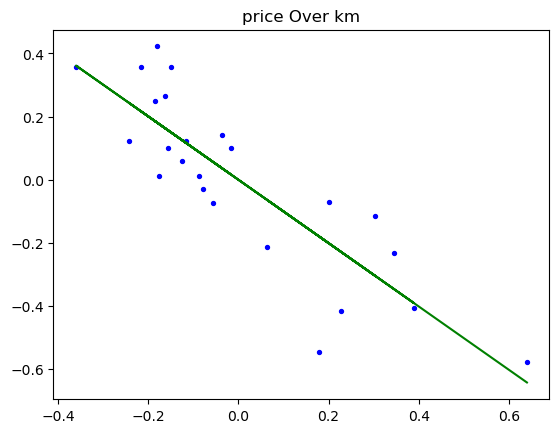

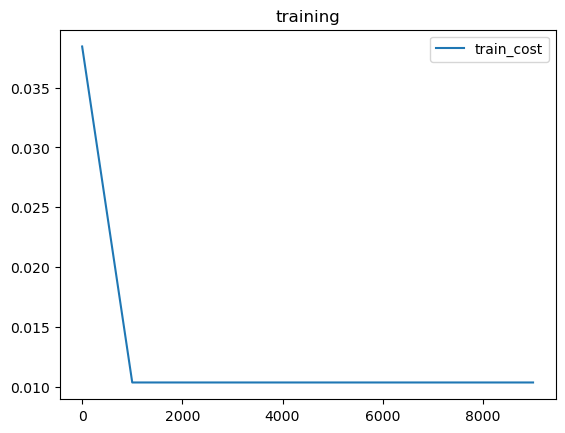

In [62]:
def plot_data(X, y, model = None):
  plt.title('price Over km')
  plt.scatter(X, y, c="b", s=8)
  if model:
    pred = model(X)
    plt.plot(X, pred, color='g')
  plt.show()

def plot_progress(epochs, train_cost):
  plt.title("training")
  plt.plot(epochs, train_cost, label="train_cost")
  plt.legend()
  plt.show()

plot_data(X, y, model)
plot_progress(arr_epoch, arr_train_cost)

In [63]:
# A more precise regression is one that has a relatively high R squared (close to 1). 
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# R-squared
print("train_r2_score: ", r2_score(y_train, model(X_train)))
print("all_r2_score: ", r2_score(y, model(X)))

print()

# Mean Squared Error (MSE)
print("train_r2_score: ", model.cost(X_train, y_train))
print("all_r2_score: ", model.cost(X, y))

train_r2_score:  0.7329747078314965
all_r2_score:  0.7329747078314965

train_r2_score:  0.010349594165039607
all_r2_score:  0.010349594165039607


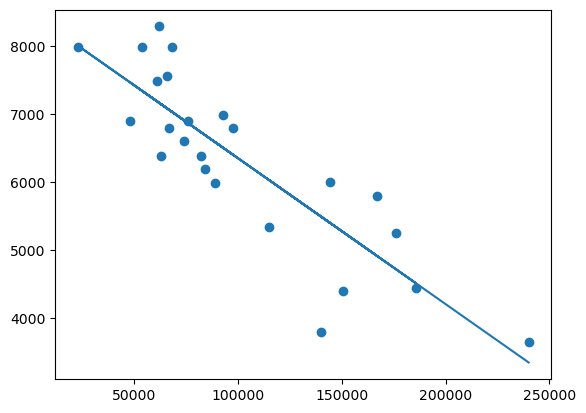

In [72]:
pred = model(X_train)

plt.scatter(data_X, data_y)
plt.plot(data_X, y_min_max_scaler.inverse_normalize(pred)) 

In [67]:
model.save("model_0.json")